## Dataset: Rain in Australia (Classification Problem) 

## Table of Contents
#### 1. [Business/Research Problem](#part1)
#### 2. [Project Background](#part2)
#### 3. [Problem Statement](#part3)
#### 4. [Report Objectives](#part4)
#### 5. [Metadata](#part5) 
#### 6. [Load and Explore the Datasets](#part6)  
#### 7. [Data Exploration and Visualization](#part7)   
#### 8. [Data Wrangling and Transformation](#part8)
   - [8.1 Descriptive Statistics](#part8.1)
   - [8.2 Correlation](#part8.2)

## Business/Research Problem  <a id="part1"></a>

The ability to accurately forecast rain plays a critical role in many aspects of life such as farming of crops as well as preventing excessive flooding in certain regions of the country. Therefore, there exists a need to use available historical data to create a prediction model for whether or not it will rain the next day.

## Project Background <a id="part2"></a>

This dataset contains about 10 years of daily weather observations from many locations across Australia.

RainTomorrow is the target variable to predict. It means -- did it rain the next day, Yes or No? This column is Yes if the rain for that day was 1mm or more.

### Source & Acknowledgements

Rain in Australia from Kaggle https://www.kaggle.com/datasets/jsphyg/weather-dataset-rattle-package

Observations were drawn from numerous weather stations. The daily observations are available from http://www.bom.gov.au/climate/data.<br>
Definitions adapted from http://www.bom.gov.au/climate/dwo/IDCJDW0000.shtml <br>
Data source: http://www.bom.gov.au/climate/dwo/ and http://www.bom.gov.au/climate/dat

## Problem Statement <a id="part3"></a>

To predict whether or not it will rain tomorrow in Australia.

## Project Objectives <a id="part4"></a>

- To develop a fully-connected and feedforward neural network for classification
- To fine tune the neural network to obtain best performance possible

## Metadata<a id="part5"></a>

1. Date: The date of observation
2. Location: The common name of the location of the weather station
3. MinTemp: The minimum temperature in degrees celsius
4. MaxTemp: The maximum temperature in degrees celsius
5. Rainfall: The amount of rainfall recorded for the day in mm
6. Evaporation: The so-called Class A pan evaporation (mm) in the 24 hours to 9am
7. Sunshine: The number of hours of bright sunshine in the day.
8. WindGustDir: The direction of the strongest wind gust in the 24 hours to midnight
9. WindGustSpeed: The speed (km/h) of the strongest wind gust in the 24 hours to midnight
10. WindDir9am: Direction of the wind at 9am
11. WindDir3pm: Direction of the wind at 3pm
12. WindSpeed9am: Wind speed (km/hr) averaged over 10 minutes prior to 9am
13. WindSpeed3pm: Wind speed (km/hr) averaged over 10 minutes prior to 3pm
14. Humidity9am: Humidity (percent) at 9am
15. Humidity3pm: Humidity (percent) at 3pm
16. Pressure9am: Atmospheric pressure (hpa) reduced to mean sea level at 9am
17. Pressure3pm: Atmospheric pressure (hpa) reduced to mean sea level at 3pm
18. Cloud9am: Fraction of sky obscured by cloud at 9am. This is measured in "oktas", which are a unit of eigths. It records how many eigths of the sky are obscured by cloud. A 0 measure indicates completely clear sky whilst an 8 indicates that it is completely overcast.
19. Cloud3pm: Fraction of sky obscured by cloud (in "oktas": eighths) at 3pm. See Cloud9am for a description of the values
20. Temp9am: Temperature (degrees C) at 9am
21. Temp3pm: Temperature (degrees C) at 3pm
22. RainToday: Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
23. RainTomorrow: The amount of next day rain in mm. Used to create response variable RainTomorrow. A kind of measure of the "risk".

In [1]:
# import the pacakges
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import scipy.stats as stats

import warnings
warnings.filterwarnings("ignore", category = UserWarning)
warnings.filterwarnings("ignore", category = RuntimeWarning)

from pandas.errors import SettingWithCopyWarning
warnings.simplefilter(action='ignore', category=(SettingWithCopyWarning))

## Load and Explore the dataset<a id="part6"></a>

### Importing Data with Pandas

#### Read in weatherAUS.csv file. Dataframe has 145,460 rows and 23 columns

In [2]:
weather_dataset = pd.read_csv("./raw_data/weatherAUS.csv")
weather_dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [3]:
# Basic summary of the Rain in Australia dataset

print(weather_dataset.shape) # 145,460 rows and 23 columns
print(weather_dataset.size) # 3345,580 records
print(weather_dataset.dtypes) # 7 Categorical columns (should be 1 date-time datatype for 'date' column) and 16 numerical columns

(145460, 23)
3345580
Date              object
Location          object
MinTemp          float64
MaxTemp          float64
Rainfall         float64
Evaporation      float64
Sunshine         float64
WindGustDir       object
WindGustSpeed    float64
WindDir9am        object
WindDir3pm        object
WindSpeed9am     float64
WindSpeed3pm     float64
Humidity9am      float64
Humidity3pm      float64
Pressure9am      float64
Pressure3pm      float64
Cloud9am         float64
Cloud3pm         float64
Temp9am          float64
Temp3pm          float64
RainToday         object
RainTomorrow      object
dtype: object


### Data Exploration and Visualization (Exploratory Data Analysis - EDA)<a id="part7"></a>

### Univariate analysis - categorical variables

### An imbalance in the number of Non-Rainy vs. Rainy days for the target variable (RainTomorrow)

In [4]:
# check the data profile in terms of Rainy vs. Non-Rainy days value. Noted that they are imbalanced

weather_dataset["RainTomorrow"].value_counts()

RainTomorrow
No     110316
Yes     31877
Name: count, dtype: int64

In [5]:
# Group by 'RainTomorrow' and count the number of data in each category

RainTomorrow = weather_dataset.groupby(['RainTomorrow'])['RainTomorrow'].count()
RainTomorrow

RainTomorrow
No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0, 0.5, 'Counts')

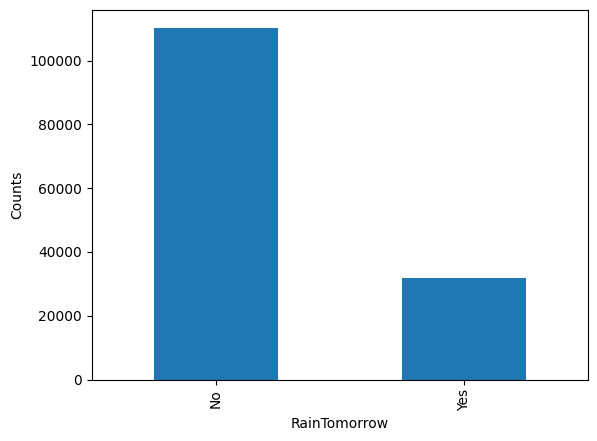

In [6]:
# Plot a bargraph for the counts 

fig = plt.figure()
ax3 = fig.add_subplot(111)

RainTomorrow.plot(kind="bar")

ax3.set_ylabel('Counts')

In [7]:
weather_dataset["RainTomorrow"].isnull().sum()

3267

In [8]:
weather_dataset = weather_dataset[weather_dataset["RainTomorrow"].notna()]
weather_dataset["RainTomorrow"].isnull().sum()

0

### Feature engineer Season column using Date (month)

In [9]:
spring = [3,4,5]
summer = [6,7,8]
autumn = [9,10,11]
winter = [12,1,2]

# create a user-defined function, month_to_season, that takes in a list of month as a parameter and return the season

def month_to_season(month):
    """return the season of the year"""
    if month in spring: 
        return 'spring'
    elif month in summer:
        return 'summer'
    elif month in autumn:
        return 'autumn'
    elif month in winter:
        return 'winter'

In [10]:
# convert the 'Date' column to a date-time datatype
# create a new 'month' column by extracting the month of the 'Date' column using df[].dt.month
# map the user-defined function, month_to_season, to the 'month' column of the dataset 
# and assigned it to a new 'season' column

weather_dataset['Date'] = pd.to_datetime(weather_dataset['Date'], format='%Y-%m-%d')
weather_dataset['month'] = weather_dataset['Date'].dt.month
weather_dataset['season'] = weather_dataset['month'].map(month_to_season)
weather_dataset

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,month,season
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No,12,winter
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No,12,winter
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No,12,winter
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No,12,winter
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No,12,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,2017-06-20,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,...,1024.7,1021.2,NaN,NaN,9.4,20.9,No,No,6,summer
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No,6,summer
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No,6,summer
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No,6,summer


### Data Wrangling and Transformation<a id="part8"></a>

In [11]:
# Drop those columns that are unnecessary for further analysis
# Convert 'yes' to 1 and 'no' to 0 in the 'RainToday' and 'RainTomorrow' columns

weather_dataset.drop(['Date', 'month'], axis=1, inplace=True)
weather_dataset["RainToday"] = weather_dataset["RainToday"].map({'Yes': 1, 'No': 0})
weather_dataset["RainTomorrow"] = weather_dataset["RainTomorrow"].map({'Yes': 1, 'No': 0})
weather_dataset

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,season
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,0.0,0,winter
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,0.0,0,winter
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,0.0,0,winter
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,0.0,0,winter
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,0.0,0,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145454,Uluru,3.5,21.8,0.0,NaN,NaN,E,31.0,ESE,E,...,27.0,1024.7,1021.2,NaN,NaN,9.4,20.9,0.0,0,summer
145455,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,...,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,0.0,0,summer
145456,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,...,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,0.0,0,summer
145457,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,...,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,0.0,0,summer


###  Descriptive statistics<a id="part8.1"></a>

In [12]:
# Use descriptive statistics to check if there are anything amiss in each numerical column. 
# All variables seem ok at the moment

weather_dataset.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,140787.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,0.223423,0.224181
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,0.416541,0.417043
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.000000,0.000000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,1.000000,1.000000


###  Correlation <a id="part8.2"></a>

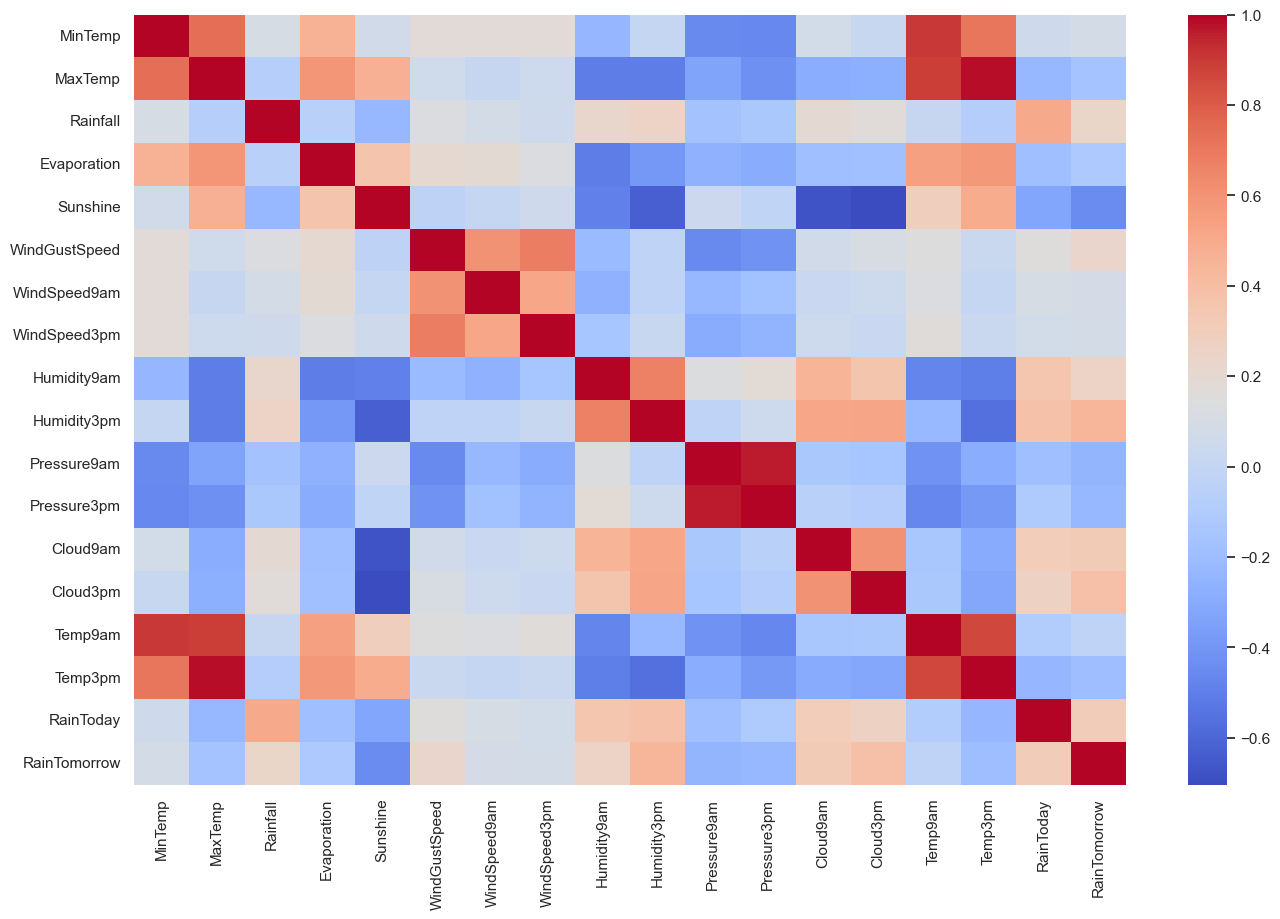

In [13]:
# find all numerical variables

num_cols = [c for c in weather_dataset.columns if weather_dataset[c].dtypes !='O']

# Use correlation to check if there are features that are highly correlated to each other

#  Within each categories "Temp", "WindSpeed", "Humidity", "Pressure", "Cloud", they are all highly correlated to each other
# 'Humidity3pm' seemed to be correlated with "RainTomorrow" target variable

sns.set(rc = {'figure.figsize':(16,10)})
sns.heatmap(weather_dataset[num_cols].corr(), cmap = 'coolwarm', annot=False)
plt.show()

In [14]:
weather_dataset[num_cols].columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [15]:
cat_cols = [c for c in weather_dataset.columns if weather_dataset[c].dtypes =='O']

weather_dataset[cat_cols].columns

Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'season'], dtype='object')

In [16]:
for cols in weather_dataset[cat_cols].columns:
    print(weather_dataset[cols].unique())

['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
['W' 'WNW' 'WSW' 'NE' 'NNW' 'N' 'NNE' 'SW' 'ENE' 'SSE' 'S' 'NW' 'SE' 'ESE'
 nan 'E' 'SSW']
['W' 'NNW' 'SE' 'ENE' 'SW' 'SSE' 'S' 'NE' nan 'SSW' 'N' 'WSW' 'ESE' 'E'
 'NW' 'WNW' 'NNE']
['WNW' 'WSW' 'E' 'NW' 'W' 'SSE' 'ESE' 'ENE' 'NNW' 'SSW' 'SW' 'SE' 'N' 'S'
 'NNE' nan 'NE']
['winter' 'spring' 'summer' 'autumn']


In [17]:
weather_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 142193 entries, 0 to 145458
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Location       142193 non-null  object 
 1   MinTemp        141556 non-null  float64
 2   MaxTemp        141871 non-null  float64
 3   Rainfall       140787 non-null  float64
 4   Evaporation    81350 non-null   float64
 5   Sunshine       74377 non-null   float64
 6   WindGustDir    132863 non-null  object 
 7   WindGustSpeed  132923 non-null  float64
 8   WindDir9am     132180 non-null  object 
 9   WindDir3pm     138415 non-null  object 
 10  WindSpeed9am   140845 non-null  float64
 11  WindSpeed3pm   139563 non-null  float64
 12  Humidity9am    140419 non-null  float64
 13  Humidity3pm    138583 non-null  float64
 14  Pressure9am    128179 non-null  float64
 15  Pressure3pm    128212 non-null  float64
 16  Cloud9am       88536 non-null   float64
 17  Cloud3pm       85099 non-null   fl

In [18]:
# convert the columns with the correct datatype 
weather_dataset['WindGustSpeed'] = weather_dataset['WindGustSpeed'].astype("Int64")
weather_dataset['WindSpeed9am'] = weather_dataset['WindSpeed9am'].astype("Int64")
weather_dataset['WindSpeed3pm'] = weather_dataset['WindSpeed3pm'].astype("Int64")
weather_dataset['Humidity9am'] = weather_dataset['Humidity9am'].astype("Int64")
weather_dataset['Humidity3pm'] = weather_dataset['Humidity3pm'].astype("Int64")
weather_dataset['Cloud9am'] = weather_dataset['Cloud9am'].astype("Int64")
weather_dataset['Cloud3pm'] = weather_dataset['Cloud3pm'].astype("Int64")
weather_dataset['RainToday'] = weather_dataset['RainToday'].astype("Int64")

In [19]:
weather_dataset.to_csv("./processed_data/weather.csv", index = False)

## End of Notebook